<a href="https://colab.research.google.com/github/ArvindRe/GuidedCapstone/blob/master/Documentation/GuidedCapstoneStep6HL_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [4]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas.util.testing as tm
%matplotlib inline
from google.colab import files
uploaded=files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
import io
df=pd.read_csv(io.StringIO(uploaded['step3_output.csv'].decode('utf-8')),index_col=0)  # removing Unnamed : 0 with index_col
df.head()

Saving step3_output.csv to step3_output.csv
User uploaded file "step3_output.csv" with length 44119 bytes


,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Alyeska Resort,Alaska,3939,2500,1,0.0,0,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,1
1,Eaglecrest Ski Area,Alaska,2600,1540,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,1
2,Hilltop Ski Area,Alaska,2090,294,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,1
3,Arizona Snowbowl,Arizona,11500,2300,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0,0
4,Sunrise Park Resort,Arizona,11100,1800,0,0.0,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,0


## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

In [5]:
#Dummy features for state
df.iloc[:,1:]

,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Alaska,3939,2500,1,0.0,0,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.0,150.000000,60.0,669.000000,65.000000,85.00000,150.000000,550.0,1
1,Alaska,2600,1540,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.0,45.000000,44.0,350.000000,47.000000,53.00000,90.000000,0.0,1
2,Alaska,2090,294,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.000000,36.0,69.000000,30.000000,34.00000,152.000000,30.0,1
3,Arizona,11500,2300,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.0,122.000000,81.0,260.000000,89.000000,89.00000,122.000000,0.0,0
4,Arizona,11100,1800,0,0.0,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.0,115.000000,49.0,250.000000,74.000000,78.00000,104.000000,80.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,Wyoming,9500,1000,0,0.0,0,0,0,1,1,1,3,14.0,1.0,1.5,300.0,0.0,115.103943,9.0,185.316456,57.916957,64.16681,120.053004,0.0,0
326,Wyoming,7428,810,0,0.0,0,0,0,1,1,1,3,48.0,1.0,1.0,184.0,18.0,61.000000,81.0,310.000000,42.000000,42.00000,77.000000,0.0,0
327,Wyoming,7808,1571,0,0.0,0,0,1,1,1,0,3,32.0,2.0,1.0,400.0,250.0,121.000000,80.0,300.000000,59.000000,59.00000,123.000000,110.0,0
328,Wyoming,9663,990,0,0.0,0,0,0,1,3,1,5,33.0,2.0,0.7,75.0,30.0,131.000000,59.0,250.000000,49.000000,49.00000,120.053004,0.0,0


In [6]:
dfo=df.iloc[:,1:].select_dtypes(include=['object']) # select object type columns
df = pd.concat([df.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)
df.head()

,Name,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters,state_Alaska,state_Arizona,state_California,state_Colorado,state_Connecticut,state_Idaho,state_Illinois,state_Indiana,state_Iowa,state_Maine,state_Maryland,state_Massachusetts,state_Michigan,state_Minnesota,state_Missouri,state_Montana,state_Nevada,state_New Hampshire,state_New Jersey,state_New Mexico,state_New York,state_North Carolina,state_Ohio,state_Oregon,state_Pennsylvania,state_Rhode Island,state_South Dakota,state_Tennessee,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,Alyeska Resort,3939,2500,1,0.0,0,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Eaglecrest Ski Area,2600,1540,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hilltop Ski Area,2090,294,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Arizona Snowbowl,11500,2300,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sunrise Park Resort,11100,1800,0,0.0,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Best Model 

In [7]:
# first we import the preprocessing package from the sklearn library
from sklearn import preprocessing

# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
X = df.drop(['Name','AdultWeekend','summit_elev'],axis=1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y = df.loc[:,'AdultWeekend']

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler = preprocessing.StandardScaler().fit(X)  #?

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled=scaler.transform(X)  #?
# Import the train_test_split function from the sklearn.model_selection utility.  
from sklearn.model_selection import train_test_split

# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y = y.ravel()

# Call the train_test_split() function with the first two parameters set to X_scaled and y 
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1) ####Not needed at this part
#all first model set
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
# Make a variable called y_pred and assign it the result of calling predict() on our model variable with parameter X_test
y_pred=model.predict(X_test)
print(y_pred)
# You might want to use the explained_variance_score() and mean_absolute_error() metrics.
# To do so, you will need to import them from sklearn.metrics. 
# You can plug y_test and y_pred into the functions to evaluate the model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
mean_absolute_error=mean_absolute_error(y_test, y_pred)
explained_variance_score=explained_variance_score(y_test, y_pred)
print('explained_variance_score:',explained_variance_score)
print('mean_absolute_error:',mean_absolute_error)
print('intercept:', lm.intercept_)
# You might want to make a pandas DataFrame displaying the coefficients for each state like so: 
# pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])
df_coef=pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)
df_coef

[ 56.93948392  88.77908353  78.48245267  75.45803861  69.04885892
  76.57864408  44.51467924  46.80374174  93.46939115  84.52737455
  50.59964017  79.08987455  50.14749174  71.04495267  62.45999174
  93.3437808   41.54202299  73.29055814  61.42385892  40.58963041
 113.25686674  36.79788236  53.83401517  49.24026517  47.95510892
  63.3125308   76.35208158  75.3359683   63.15432767  66.35354642
  34.0937808   58.43362455  79.68557767  56.9531558   75.4765933
  49.18313627  22.99319486  29.0859683   61.7734683   37.52932767
  48.60745267  63.83205442  86.55081205  72.36233549  72.43557767
  58.66995267  60.08987455 165.3359683   37.46389799  60.67580442
  68.66604642  60.0156558   53.2109683   43.91311674  59.32327299
  41.26467924  85.4863513   39.22854642 119.37112455 119.02932767
  56.46585111  53.25588255  41.7344058   81.2265933   64.65872221
  43.45120267  36.25979642  96.61135892  61.19924955  23.83987455
  67.99905424 145.9687808   58.16018705  62.14358549  75.2187808
  70.8559878

,Coefficient
total_chairs,2.068565e+13
fastQuads,7.841978e+12
surface,7.347345e+12
double,6.474753e+12
triple,5.775924e+12
quad,4.681173e+12
fastSixes,2.324758e+12
trams,1.997497e+12
state_New York,6.097771e+11
state_Michigan,5.754640e+11


## Review the results 

In [8]:
#X.head()
X.dtypes

vertical_drop             int64
trams                     int64
fastEight               float64
fastSixes                 int64
fastQuads                 int64
quad                      int64
triple                    int64
double                    int64
surface                   int64
total_chairs              int64
Runs                    float64
TerrainParks            float64
LongestRun_mi           float64
SkiableTerrain_ac       float64
Snow Making_ac          float64
daysOpenLastYear        float64
yearsOpen               float64
averageSnowfall         float64
AdultWeekday            float64
projectedDaysOpen       float64
NightSkiing_ac          float64
clusters                  int64
state_Alaska              uint8
state_Arizona             uint8
state_California          uint8
state_Colorado            uint8
state_Connecticut         uint8
state_Idaho               uint8
state_Illinois            uint8
state_Indiana             uint8
state_Iowa                uint8
state_Ma

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [9]:
from google.colab import files
uploaded=files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
import io
df_predict=pd.read_csv(io.StringIO(uploaded['1589505302_05152020_updated_ski_data_-_updated_ski_data.csv'].decode('utf-8')))
df_predict.head()

Saving 1589505302_05152020_updated_ski_data_-_updated_ski_data.csv to 1589505302_05152020_updated_ski_data_-_updated_ski_data.csv
User uploaded file "1589505302_05152020_updated_ski_data_-_updated_ski_data.csv" with length 35555 bytes


,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [10]:
#Removing NaNs
df_predict['fastEight']=df_predict['fastEight'].fillna(0)
df_predict['NightSkiing_ac']=df_predict['NightSkiing_ac'].fillna(0)
df_predict['AdultWeekday'].fillna((df_predict['AdultWeekday'].mean()), inplace=True)
df_predict['TerrainParks']=df_predict['TerrainParks'].fillna(0)
df_predict['Snow Making_ac']=df_predict['Snow Making_ac'].fillna(0)
df_predict['SkiableTerrain_ac']=df_predict['SkiableTerrain_ac'].fillna(0)
df_predict['daysOpenLastYear'].fillna((df_predict['daysOpenLastYear'].mean()), inplace=True)
df_predict['projectedDaysOpen'].fillna((df_predict['projectedDaysOpen'].mean()), inplace=True)
df_predict['averageSnowfall'].fillna((df_predict['averageSnowfall'].mean()), inplace=True)
df_predict['LongestRun_mi'].fillna((df_predict['LongestRun_mi'].mean()), inplace=True)
df_predict['Runs'].fillna((df_predict['Runs'].mean()), inplace=True)
df_predict['yearsOpen'].fillna((df_predict['yearsOpen'].mean()), inplace=True)
df_predict['AdultWeekend'].fillna((df_predict['AdultWeekend'].mean()), inplace=True)
import pandas as pd
nas=pd.DataFrame(df_predict.isnull().sum().sort_values(ascending=False)/len(df_predict),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent


In [11]:
#Dummy features for state
df_predict.iloc[:,2:]

,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alaska,3939,2500,250,1,0.0,0,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.0,150.000000,60.0,669.0,65.000000,85.0,150.00000,550.0
1,Alaska,2600,1540,1200,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.0,45.000000,44.0,350.0,47.000000,53.0,90.00000,0.0
2,Alaska,2090,294,1796,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.000000,36.0,69.0,30.000000,34.0,152.00000,30.0
3,Arizona,11500,2300,9200,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.0,122.000000,81.0,260.0,89.000000,89.0,122.00000,0.0
4,Arizona,11100,1800,9200,0,0.0,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.0,115.000000,49.0,250.0,74.000000,78.0,104.00000,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,Wyoming,7428,810,6619,0,0.0,0,0,0,1,1,1,3,48.0,1.0,1.0,184.0,18.0,61.000000,81.0,310.0,42.000000,42.0,77.00000,0.0
327,Wyoming,7808,1571,6237,0,0.0,0,0,1,1,1,0,3,32.0,2.0,1.0,400.0,250.0,121.000000,80.0,300.0,59.000000,59.0,123.00000,110.0
328,Wyoming,9663,990,8798,0,0.0,0,0,0,1,3,1,5,33.0,2.0,0.7,75.0,30.0,131.000000,59.0,250.0,49.000000,49.0,120.06338,0.0
329,Wyoming,9500,1100,8400,0,0.0,0,0,0,2,0,0,2,25.0,0.0,0.4,370.0,0.0,115.132143,81.0,150.0,58.000289,49.0,120.06338,0.0


In [12]:
dfo_predict=df_predict.iloc[:,2:].select_dtypes(include=['object']) # select object type columns
df_predict = pd.concat([df_predict.drop(dfo_predict, axis=1), pd.get_dummies(dfo_predict)], axis=1)
df_predict.head()

,Name,Region,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,state_Alaska,state_Arizona,state_California,state_Colorado,state_Connecticut,state_Idaho,state_Illinois,state_Indiana,state_Iowa,state_Maine,state_Maryland,state_Massachusetts,state_Michigan,state_Minnesota,state_Missouri,state_Montana,state_Nevada,state_New Hampshire,state_New Jersey,state_New Mexico,state_New York,state_North Carolina,state_Ohio,state_Oregon,state_Pennsylvania,state_Rhode Island,state_South Dakota,state_Tennessee,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,Alyeska Resort,Alaska,3939,2500,250,1,0.0,0,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Eaglecrest Ski Area,Alaska,2600,1540,1200,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hilltop Ski Area,Alaska,2090,294,1796,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Arizona Snowbowl,Arizona,11500,2300,9200,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sunrise Park Resort,Arizona,11100,1800,9200,0,0.0,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


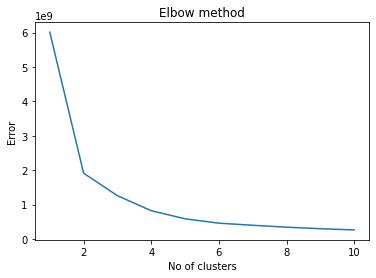

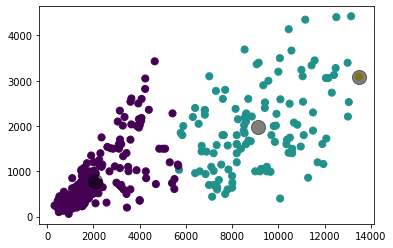

In [13]:
#Cluster Column
from sklearn.cluster import KMeans
xk = df_predict.drop(['Name','Region','base_elev'], axis =1).values
Error =[]
for i in range(1, 11):
   kmeans = KMeans(n_clusters = i).fit(xk)
   kmeans.fit(xk)
   Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()
# This code will fit the k-means algorithm with our k parameter set to three, and plot the results. Cool, huh? 
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(xk)
plt.scatter(xk[:, 0], xk[:, 1], c=y_kmeans3, s=50, cmap='viridis')

centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
# Make a new column in your df_predict dataframe called 'clusters', and assign it the variable: y_kmeans3
df_predict['clusters']=y_kmeans3

In [14]:
resort=df_predict[df_predict['Name'].str.contains('Big Mountain Resort')]  #With the other dataset
resort.head()

,Name,Region,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,state_Alaska,state_Arizona,state_California,state_Colorado,state_Connecticut,state_Idaho,state_Illinois,state_Indiana,state_Iowa,state_Maine,state_Maryland,state_Massachusetts,state_Michigan,state_Minnesota,state_Missouri,state_Montana,state_Nevada,state_New Hampshire,state_New Jersey,state_New Mexico,state_New York,state_North Carolina,state_Ohio,state_Oregon,state_Pennsylvania,state_Rhode Island,state_South Dakota,state_Tennessee,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming,clusters
151,Big Mountain Resort,Montana,6817,2353,4464,0,0.0,0,3,2,6,0,3,14,105.0,4.0,3.3,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
330,Big Mountain Resort Test,New York,6817,2353,4464,0,0.0,0,3,2,6,0,3,14,105.0,4.0,3.3,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [15]:
X_resort = resort.drop(['Name','Region','AdultWeekend', 'summit_elev','base_elev','AdultWeekend'], axis=1)
y_resort = resort.loc[:,'AdultWeekend']
#scaler_resort = preprocessing.StandardScaler().fit(X_resort)
X_scaled_resort=scaler.transform(X_resort)

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [16]:
print(lm.predict(X_scaled_resort))  #? inst32 and int64 clash?
#X_resort.dtypes

[2.03259048e+12 2.03259048e+12]


**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [17]:
print(y_resort)

151    81.0
330    81.0
Name: AdultWeekend, dtype: float64


In [18]:
resort_test=df_predict[df_predict['Name'].str.contains('Big Mountain Resort Test')]  #With the other dataset, with different state
X_resort_test = resort_test.drop(['Name','Region','AdultWeekend', 'summit_elev','base_elev','AdultWeekend'], axis=1)
y_resort_test = resort_test.loc[:,'AdultWeekend']
#scaler_resort_test = preprocessing.StandardScaler().fit(X_resort_test)
X_scaled_resort_test=scaler.transform(X_resort_test)
print(lm.predict(X_scaled_resort_test)) 

[2.03259048e+12]


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

Text(0.5, 1.0, 'summit_elev by vertical_drop by cluster')

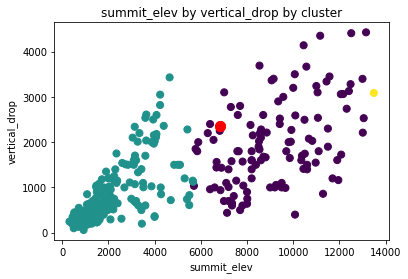

In [19]:
ac=resort
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['summit_elev'], ac['vertical_drop'], c='red', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')

Text(0.5, 1.0, 'AdultWeekday by AdultWeekend by cluster')

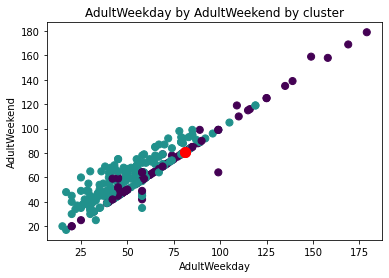

In [20]:
plt.scatter(df['AdultWeekday'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['AdultWeekday'], ac['AdultWeekend'], c='red', s=100)
plt.xlabel('AdultWeekday')
plt.ylabel('AdultWeekend')
plt.title('AdultWeekday by AdultWeekend by cluster')

Text(0.5, 1.0, 'quad by AdultWeekend by cluster')

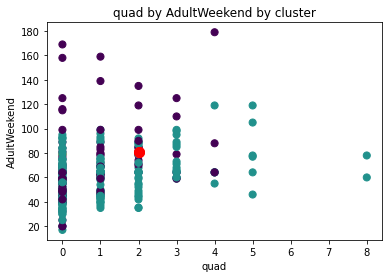

In [21]:
plt.scatter(df['quad'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['quad'], ac['AdultWeekend'], c='red', s=100)
plt.xlabel('quad')
plt.ylabel('AdultWeekend')
plt.title('quad by AdultWeekend by cluster')

Text(0.5, 1.0, 'Week day vs Weekend')

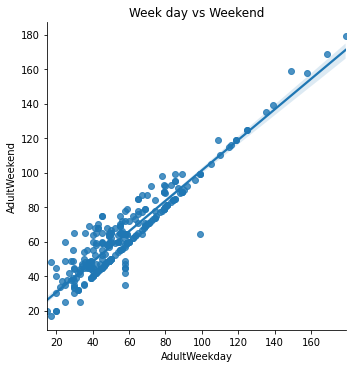

In [22]:
sns.lmplot(x='AdultWeekday',y='AdultWeekend', data=df)
plt.xlabel('AdultWeekday')
plt.ylabel('AdultWeekend')
plt.title('Week day vs Weekend')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [23]:
#import pickle
#s = pickle.dumps(model)
#from joblib import dump, load
#dump(model, 'models/regression_model_adultweekend.joblib') 

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  

# get the folder id where you want to save your file
file = drive.CreateFile({'parents':[{u'id': folder_id}]})
file.SetContentFile('data.pkl')
file.Upload() 

NameError: ignored

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [29]:
from sklearn import preprocessing
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
coeff = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient']).sort_values(by='Coefficient',ascending=False)
coeff['Feature'] = X.columns
coeff['MAE'] = mean_absolute_error(y_test, y_pred)
coeff['ExVariance'] = explained_variance_score(y_test, y_pred)
coeff['r2_score']=r2_score(y_test, y_pred)

In [30]:
coeff

,Coefficient,Feature,MAE,ExVariance,r2_score
total_chairs,2.068565e+13,vertical_drop,4.929091,0.940402,0.94022
fastQuads,7.841978e+12,trams,4.929091,0.940402,0.94022
surface,7.347345e+12,fastEight,4.929091,0.940402,0.94022
double,6.474753e+12,fastSixes,4.929091,0.940402,0.94022
triple,5.775924e+12,fastQuads,4.929091,0.940402,0.94022
quad,4.681173e+12,quad,4.929091,0.940402,0.94022
fastSixes,2.324758e+12,triple,4.929091,0.940402,0.94022
trams,1.997497e+12,double,4.929091,0.940402,0.94022
state_New York,6.097771e+11,surface,4.929091,0.940402,0.94022
state_Michigan,5.754640e+11,total_chairs,4.929091,0.940402,0.94022
